<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
breast_cancer_csv = 'C:\\Users\\apple\\Downloads\\breast-cancer-wisconsin-data.csv'
#breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA 

In [22]:
# Head
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
breast_cancer.shape

(569, 32)

In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [24]:
breast_cancer.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [25]:
# All values are null. We'll drop them.
breast_cancer.drop(labels='Unnamed: 32', axis=1, inplace=True, errors='ignore')

In [26]:
breast_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [28]:
breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [29]:
breast_cancer[['diagnosis']]

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M
...,...
926424,M
926682,M
926954,M


In [30]:
breast_cancer['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [31]:
# Pair Plot
#sns.pairplot(breast_cancer)

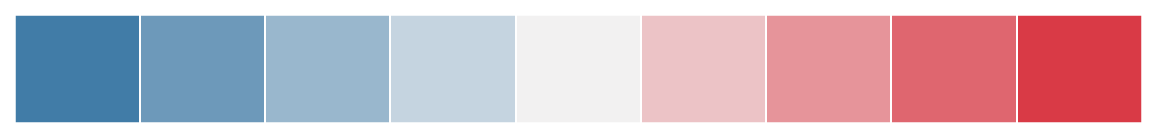

In [32]:
sns.set_theme()
sns.palplot(sns.diverging_palette(240, 10, n=9))

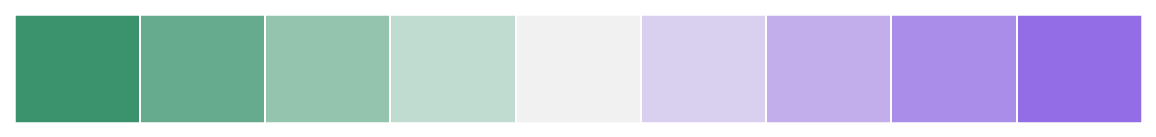

In [33]:
sns.palplot(sns.diverging_palette(150, 275, s=80, l=55, n=9))

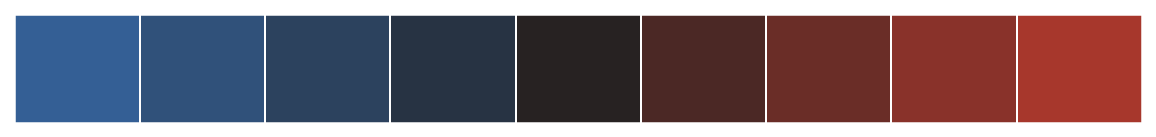

In [34]:
sns.palplot(sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark"))

In [35]:
from numpy import arange
x = arange(25).reshape(5, 5)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
#ax = sns.heatmap(x, cmap=cmap)
cmap

In [36]:
mask = np.zeros_like(breast_cancer.corr(),dtype=bool)
mask
#np.triu_indices_from(mask)
mask[np.triu_indices_from(mask)] = True
mask
#f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap

In [37]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
#uniform_data = np.random.rand(10, 12)
#uniform_data#ax = sns.heatmap(uniform_data)
#uniform_data

In [38]:
#ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

In [39]:
normal_data = np.random.randn(10, 12)
#normal_data
#ax = sns.heatmap(normal_data, center=0)

In [40]:
plt.figure(figsize=(10,8))
flights = sns.load_dataset("flights")
flights
flights = flights.pivot("month", "year", "passengers")
#flights
#ax = sns.heatmap(flights)

<Figure size 720x576 with 0 Axes>

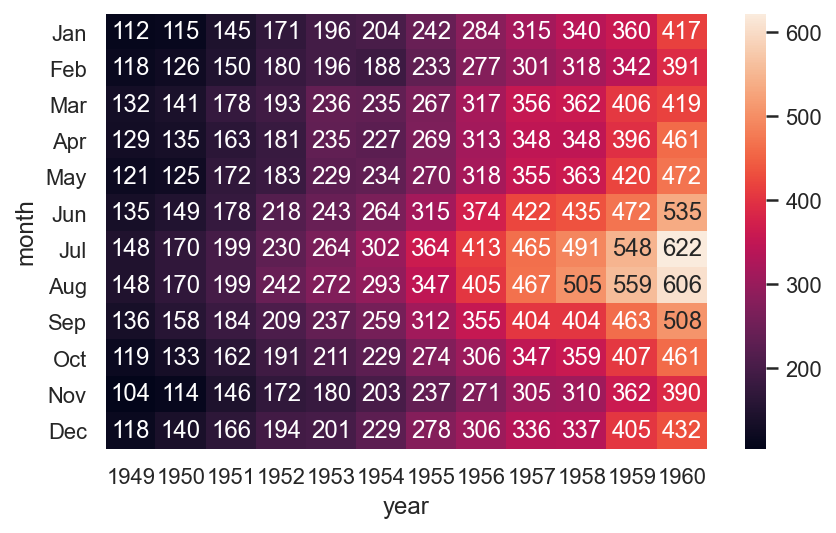

In [41]:
ax = sns.heatmap(flights, annot=True, fmt="d")
#https://zhuanlan.zhihu.com/p/35494575

In [ ]:
plot::
    :context: close-figs

    >>> import numpy as np; np.random.seed(0)
    >>> import seaborn as sns; sns.set_theme()
    >>> uniform_data = np.random.rand(10, 12)
    >>> ax = sns.heatmap(uniform_data)

Change the limits of the colormap:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

Plot a heatmap for data centered on 0 with a diverging colormap:

.. plot::
    :context: close-figs

    >>> normal_data = np.random.randn(10, 12)
    >>> ax = sns.heatmap(normal_data, center=0)

Plot a dataframe with meaningful row and column labels:

.. plot::
    :context: close-figs

    >>> flights = sns.load_dataset("flights")
    >>> flights = flights.pivot("month", "year", "passengers")
    >>> ax = sns.heatmap(flights)

Annotate each cell with the numeric value using integer formatting:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, annot=True, fmt="d")

Add lines between each cell:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, linewidths=.5)

Use a different colormap:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, cmap="YlGnBu")

Center the colormap at a specific value:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, center=flights.loc["Jan", 1955])

Plot every other column label and don't plot row labels:

.. plot::
    :context: close-figs

    >>> data = np.random.randn(50, 20)
    >>> ax = sns.heatmap(data, xticklabels=2, yticklabels=False)

Don't draw a colorbar:

.. plot::
    :context: close-figs

    >>> ax = sns.heatmap(flights, cbar=False)

Use different axes for the colorbar:

.. plot::
    :context: close-figs

    >>> grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
    >>> f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
    >>> ax = sns.heatmap(flights, ax=ax,
    ...                  cbar_ax=cbar_ax,
    ...                  cbar_kws={"orientation": "horizontal"})

Use a mask to plot only part of a matrix

.. plot::
    :context: close-figs

    >>> corr = np.corrcoef(np.random.randn(10, 200))
    >>> mask = np.zeros_like(corr)
    >>> mask[np.triu_indices_from(mask)] = True
    >>> with sns.axes_style("white"):
    ...     f, ax = plt.subplots(figsize=(7, 5))
    ...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
File:      c:\users\apple\anaconda3\lib\site-packages\seaborn\matrix.py
Type:      function

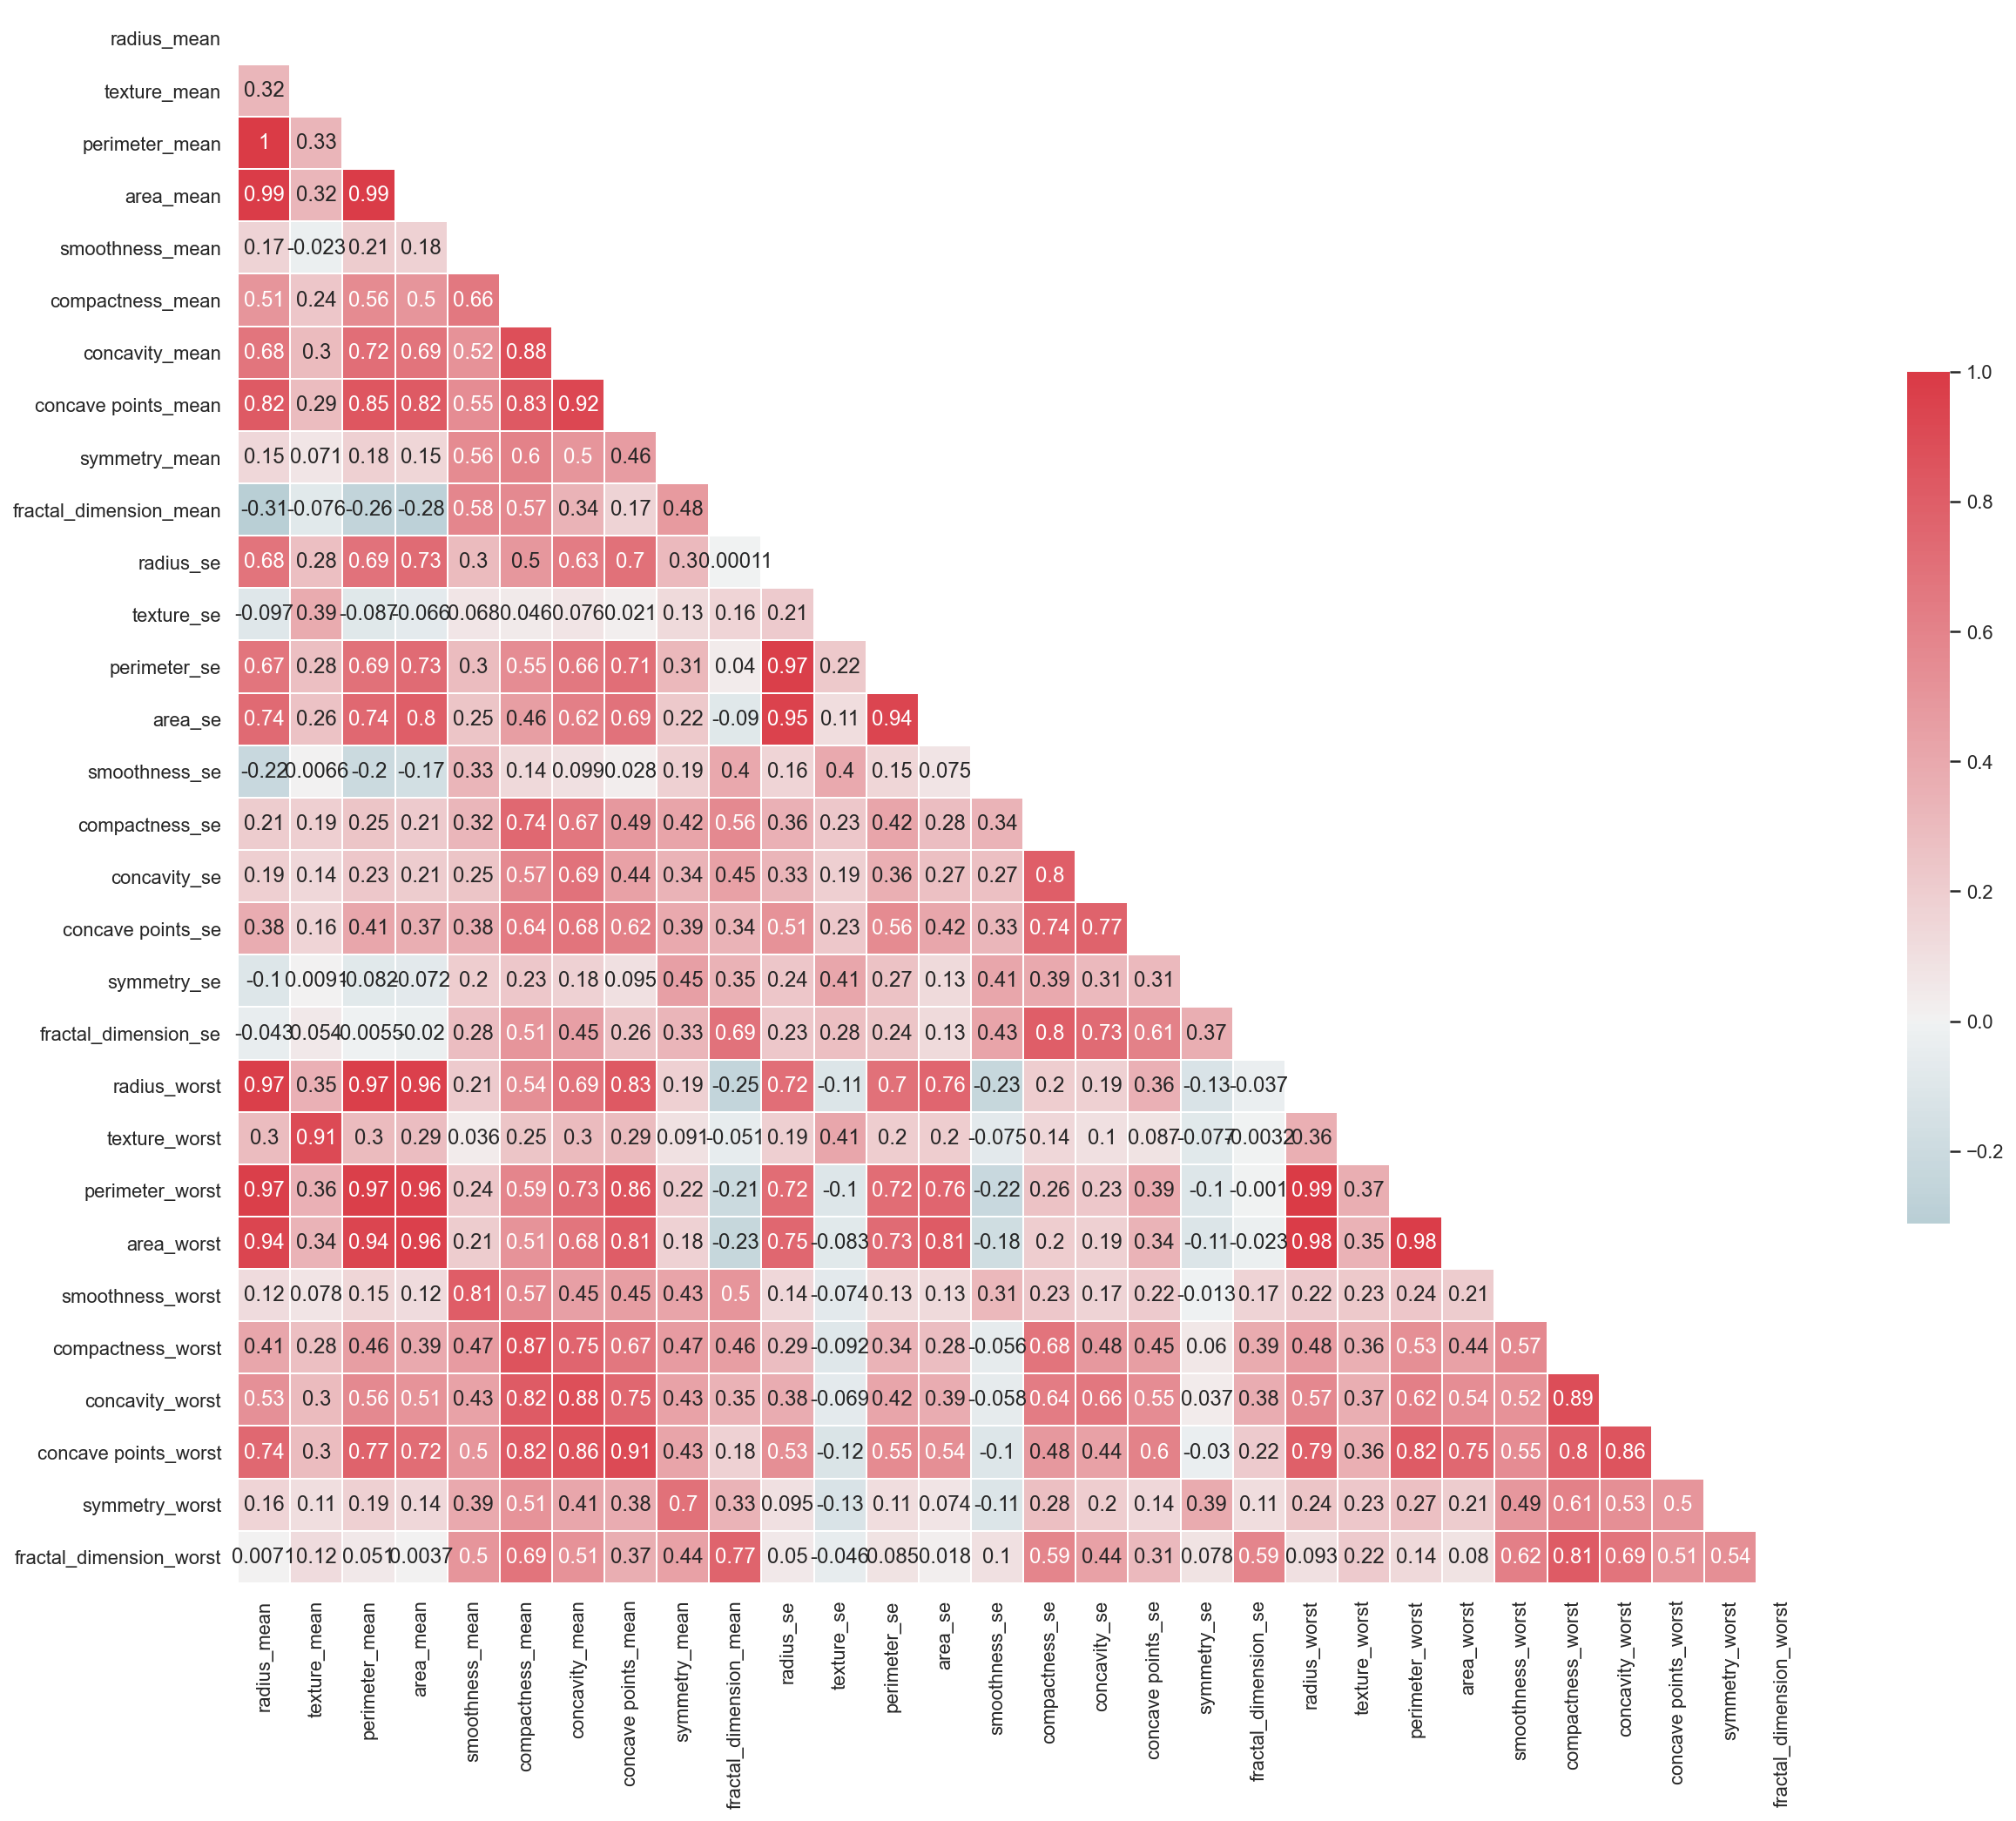

In [93]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)

plt.show();

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [42]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]
#feature_cols
X =  breast_cancer[feature_cols]

y = breast_cancer[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
XCopy=X_test
lin_model = LogisticRegression(solver='liblinear')
lin_model
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)
#y_pred = lin_model.predict(X_test)
XCopy["y_pred"]=lin_model.predict(X_test)
XCopy['y_test']=y_test
XCopy

<ipython-input-42-9365cec1f2b2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XCopy["y_pred"]=lin_model.predict(X_test)
<ipython-input-42-9365cec1f2b2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XCopy['y_test']=y_test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,y_pred,y_test
id,,,,,,,,,,,,,,,,,,,,,
906564,14.69,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208,B,B
85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,0.06777,...,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,M,M
891670,12.95,16.02,83.14,513.7,0.10050,0.07943,0.061550,0.033700,0.1730,0.06470,...,88.81,585.4,0.14830,0.20680,0.22410,0.10560,0.3380,0.09584,B,B
874217,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,0.1621,0.05425,...,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938,M,M
905680,15.13,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,0.1852,0.05294,...,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88203002,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,B,B
905557,14.99,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,110.20,867.1,0.10770,0.33450,0.31140,0.13080,0.3163,0.09251,M,B
91594602,15.05,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,0.05915,...,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954,M,M


In [125]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [146]:
y_true = [1, 0, 0, 0]
y_pred = [1, 1, 1, 1]
confusion_matrix(y_true, y_pred)

array([[0, 3],
       [0, 1]], dtype=int64)

In [152]:
tn, fp, fn, tp = confusion_matrix([1,0,0,0], [1, 1, 1,1]).ravel()
tn, fp, fn, tp

(0, 3, 0, 1)

In [147]:
confusion_matrix(y_pred,y_true)

array([[0, 0],
       [3, 1]], dtype=int64)

In [133]:
cm= confusion_matrix([2, 0, 2, 2, 0, 1], [0, 0, 2, 2, 0, 2]).ravel()
cm

array([2, 0, 0, 0, 0, 1, 1, 0, 2], dtype=int64)

In [141]:
confusion_matrix([1, 0, 1, 1, 0, 1], [0, 0, 0, 1, 0, 0])

array([[2, 0],
       [3, 1]], dtype=int64)

In [139]:
tn, fp, fn, tp = confusion_matrix([1, 0, 1, 1, 0, 1], [0, 0, 0, 1, 0, 0]).ravel()
tn, fp, fn, tp

(2, 0, 3, 1)

Accuracy is:  0.951048951048951
[[86  2]
 [ 5 50]]
              precision    recall  f1-score   support

           B       0.95      0.98      0.96        88
           M       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



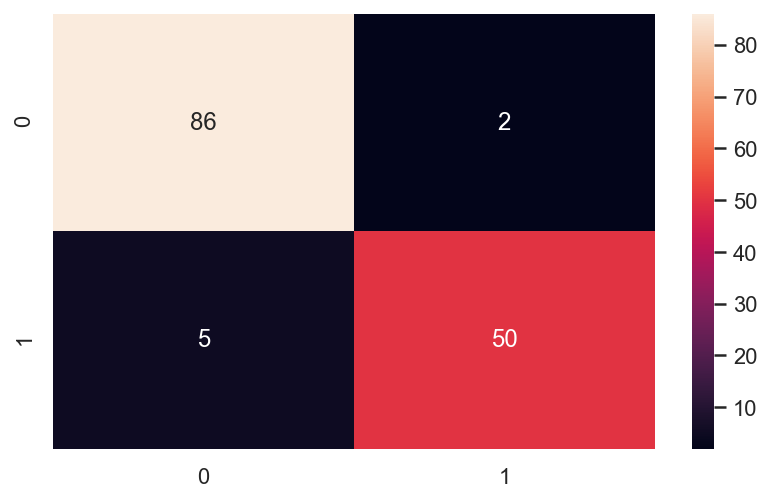

In [154]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X =  breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lin_model = LogisticRegression(solver='liblinear')
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

y_pred = lin_model.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

In [127]:
#Accuracy: (TP+TN)/(TP+TN)
(86+50)/(86+50+5+2)

0.951048951048951

In [155]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(86, 2, 5, 50)

In [163]:
#recall: TP/(TP+FN)
recall=50/(50+5)
recall

0.9090909090909091

In [164]:
#presion:TP/(TP+FP)
presion=50/(50+2)
presion

0.9615384615384616

In [166]:
#F1 Score: https://deepai.org/machine-learning-glossary-and-terms/f-score
2*(recall*presion)/(recall+presion)


0.9345794392523366

# 3.extra

Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve

Chanin Nantasenamat

Data Professor YouTube channel, http://youtube.com/dataprofessor

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using the Iris data set as an example.

## Generate synthetic dataset¶

In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

Add noisy features to make the problem more difficult 

In [3]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

## Data splitting

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [9]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [11]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [12]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)


In [15]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.925
Naive Bayes: AUROC = 0.993


In [16]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [17]:
import matplotlib.pyplot as plt

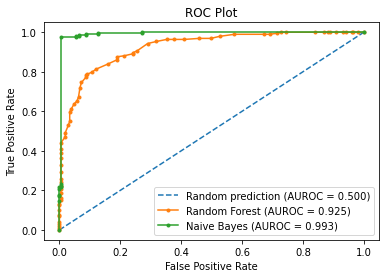

In [18]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

In [43]:
bm_map = {
    'B': 0,
    'M': 1
}

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(bm_map)

Accuracy is:  0.9440559440559441
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



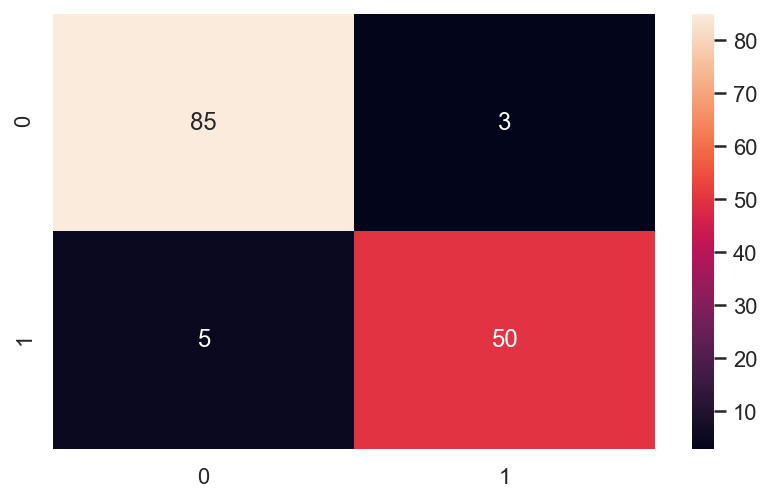

In [44]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X =  breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

In [45]:
breast_cancer['diagnosis'].isnull().sum()

0

### 4. Naive Bayes
#### 4.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

Accuracy is:  0.9440559440559441
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



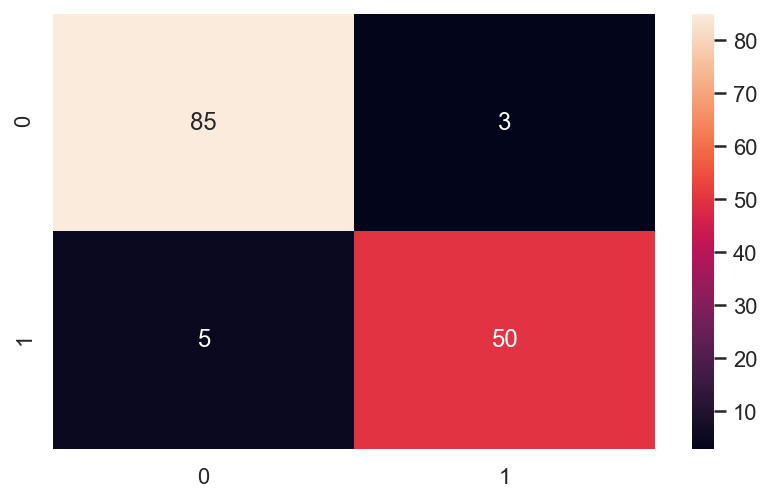

In [169]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Score 
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

**Note:** It'll take time to execute this. After running the cell, wait for result.

In [13]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\apple\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\apple\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [14]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.9402887750349324


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [170]:
# gridsearch SVM

#from sklearn.grid_search import GridSearchCV

svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1)
svc_gs.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 15.2min finished


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [173]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.9508150908244062


In [195]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
scores
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
#fpr
#array([0. , 0. , 0.5, 0.5, 1. ])
#tpr
#array([0. , 0.5, 0.5, 1. , 1. ])
#thresholds
#array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])#

array([0.1 , 0.4 , 0.35, 0.8 ])

In [204]:
print(len(yhat_pp_lin[:,1]))

143


In [200]:
from sklearn import metrics

yhat_pp_lin = lin_model.predict_proba(X_test)
#yhat_pp_lin
hat_pp = svc_model.predict_proba(X_test)
#yhat_pp
yhat_pp_nb = model.predict_proba(X_test)
#yhat_pp_nb
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds=metrics.roc_curve(y_test, yhat_pp_lin[:,1], pos_label= 1)

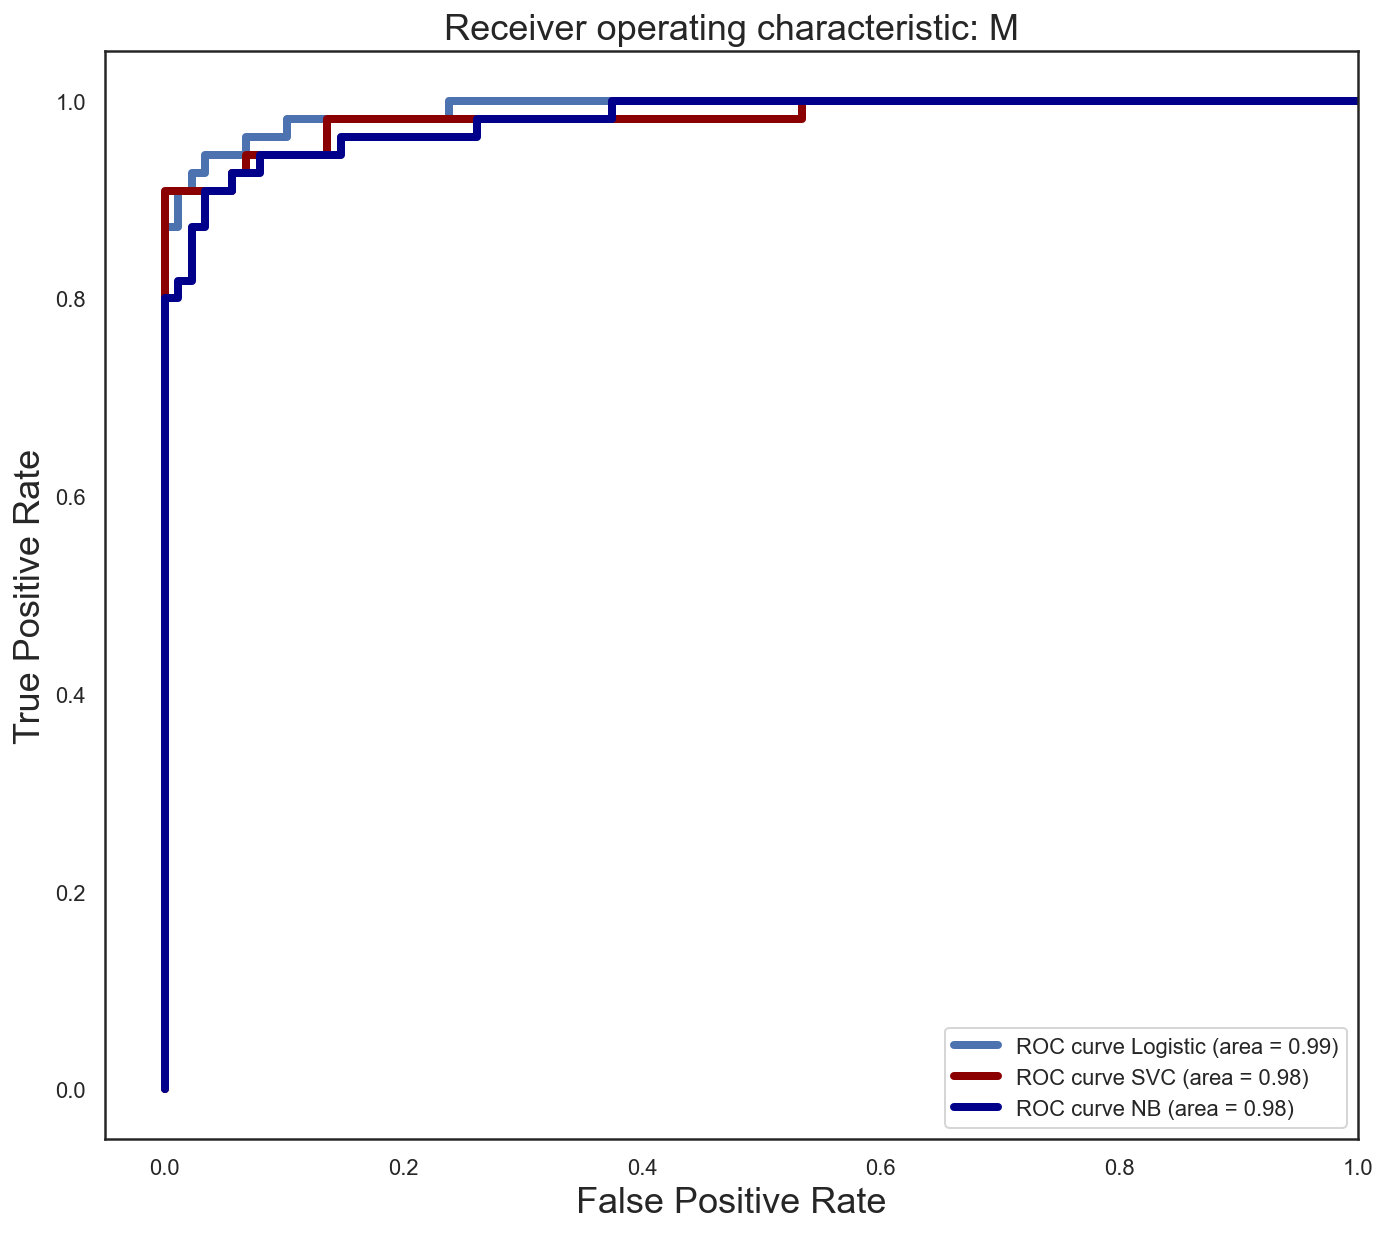

In [201]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
yhat_pp_lin = lin_model.predict_proba(X_test)
yhat_pp = svc_model.predict_proba(X_test)
yhat_pp_nb = model.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test, yhat_pp_lin[:,1], pos_label=1)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, yhat_pp[:,1], pos_label=1)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_pp_nb[:,1], pos_label=1)

plt.figure(figsize=[10,10])

plt.plot(fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 6. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

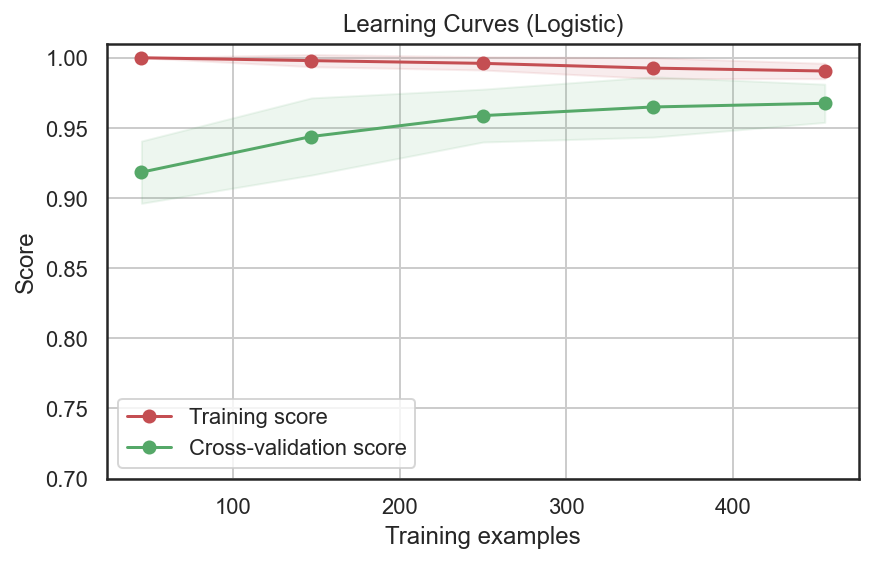

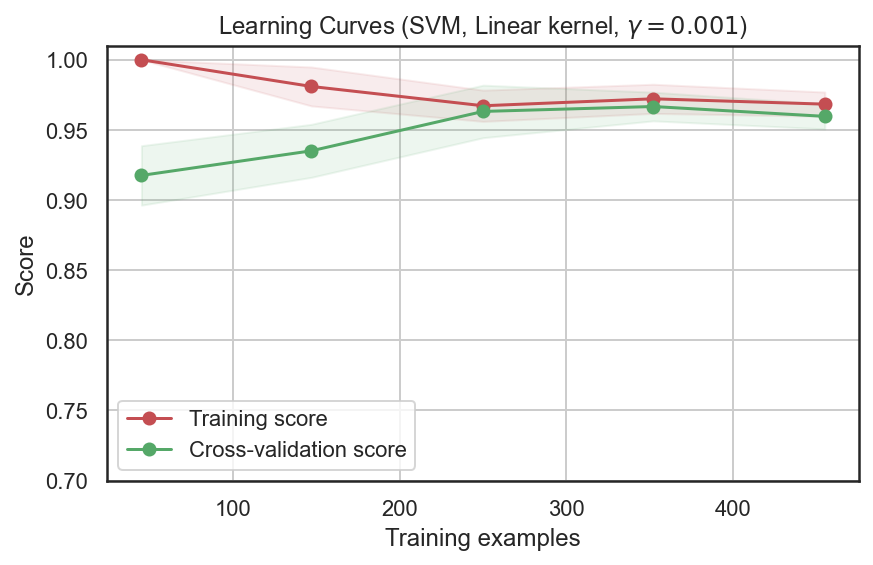

In [202]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X =  breast_cancer[feature_cols]
y = breast_cancer[target_col]

title = "Learning Curves (Logistic)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

estimator = LogisticRegression(C = 70.17038286703837, penalty = 'l1', solver = 'liblinear')
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

estimator = SVC(C=27.825594022071257, gamma=1e-05, kernel = 'linear')
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show();

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



